In [79]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import SGD, Adam
from dataset import Solar_Dataset
from model_sep import Solar_Classifier
from matplotlib import rcParams
import argparse
from tqdm import tqdm
import seaborn as sns
from skimage.feature import hog
import matplotlib as mpl
import PIL
from PIL import Image
from PIL import ImageEnhance  
import seaborn as sns
import cv2
from tensorflow.keras import backend as K
from Data_Augmentation_modules import contrast, rotate, flip, sharpness, noise, data_aug, augment_image

In [2]:
%matplotlib inline

In [80]:
sol_clas = Solar_Classifier() #creates an instance of the solar classification network
criterion = SparseCategoricalCrossentropy()

optimiser = Adam(0.6*10e-6)

In [81]:
test_losses = []
train_dataset = Solar_Dataset(dat_file="/Users/mariam/Desktop/courses/ADL/Data/new_solar_train_data.npz")
val_dataset = Solar_Dataset(dat_file="/Users/mariam/Desktop/courses/ADL/Data/new_solar_test_data.npz")


#train_dataset = Solar_Dataset(dat_file="/Users/mariam/Desktop/courses/ADL/Slic-1.1.1 2_tensorflow/solar_train_data.npz")
#val_dataset = Solar_Dataset(dat_file="/Users/mariam/Desktop/courses/ADL/Slic-1.1.1 2_tensorflow/solar_test_data.npz")


#train_dataset= data_aug(train_dataset)
#val_dataset = data_aug(val_dataset)



In [82]:
sol_clas.compile(optimizer = optimiser , loss = criterion, metrics =['accuracy'])
sol_clas.build((None, 1, 256,256))
sol_clas.summary()


Model: "solar__classifier_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 max_pooling2d_4 (MaxPooling  multiple                 0         
 2D)                                                             
                                                                 
 sequential_36 (Sequential)  (None, 1, 256, 64)        19008     
                                                                 
 sequential_37 (Sequential)  (None, 1, 256, 64)        4992      
                                                                 
 sequential_38 (Sequential)  (None, 1, 128, 128)       9408      
                                                                 
 sequential_39 (Sequential)  (None, 1, 128, 128)       18176     
                                                                 
 sequential_40 (Sequential)  (None, 1, 64, 256)        35200     
                                               

In [83]:
checkpoint = keras.callbacks.ModelCheckpoint('tensor_model/model.h5', verbose = 1, save_best_only=True)

callbacks  = [keras.callbacks.EarlyStopping(patience = 2, monitor = 'val_loss'), 
                      keras.callbacks.TensorBoard(log_dir= 'logs')]

results_dec = sol_clas.fit(train_dataset.data,train_dataset.label,  batch_size = 128, epochs = 150, validation_data=[val_dataset.data, val_dataset.label])

Epoch 1/150
79/79 [==============================] - 36s 257ms/step - loss: 7.4506 - accuracy: 0.2809 - val_loss: 9.9616 - val_accuracy: 0.0955
Epoch 2/150
79/79 [==============================] - 13s 161ms/step - loss: 5.5012 - accuracy: 0.3973 - val_loss: 10.2108 - val_accuracy: 0.0955
Epoch 3/150
79/79 [==============================] - 12s 149ms/step - loss: 4.5347 - accuracy: 0.4803 - val_loss: 10.4184 - val_accuracy: 0.2509
Epoch 4/150
79/79 [==============================] - 11s 141ms/step - loss: 3.9026 - accuracy: 0.5312 - val_loss: 10.5941 - val_accuracy: 0.2509
Epoch 5/150
79/79 [==============================] - 12s 157ms/step - loss: 3.1840 - accuracy: 0.5968 - val_loss: 10.6751 - val_accuracy: 0.2509
Epoch 6/150
79/79 [==============================] - 13s 165ms/step - loss: 2.8346 - accuracy: 0.6225 - val_loss: 10.7609 - val_accuracy: 0.2509
Epoch 7/150
79/79 [==============================] - 14s 177ms/step - loss: 2.3942 - accuracy: 0.6726 - val_loss: 10.8390 - val_acc

79/79 [==============================] - 12s 146ms/step - loss: 0.4458 - accuracy: 0.9488 - val_loss: 2.1359 - val_accuracy: 0.7080
Epoch 58/150
79/79 [==============================] - 12s 155ms/step - loss: 0.4344 - accuracy: 0.9502 - val_loss: 2.3330 - val_accuracy: 0.7021
Epoch 59/150
79/79 [==============================] - 13s 170ms/step - loss: 0.4033 - accuracy: 0.9521 - val_loss: 2.4502 - val_accuracy: 0.6866
Epoch 60/150
79/79 [==============================] - 12s 150ms/step - loss: 0.3687 - accuracy: 0.9547 - val_loss: 2.4168 - val_accuracy: 0.6906
Epoch 61/150
79/79 [==============================] - 12s 152ms/step - loss: 0.4468 - accuracy: 0.9449 - val_loss: 2.4990 - val_accuracy: 0.6863
Epoch 62/150
79/79 [==============================] - 12s 149ms/step - loss: 0.4709 - accuracy: 0.9391 - val_loss: 2.3761 - val_accuracy: 0.6928
Epoch 63/150
79/79 [==============================] - 12s 148ms/step - loss: 0.4974 - accuracy: 0.9443 - val_loss: 2.5763 - val_accuracy: 0.690

79/79 [==============================] - 16s 191ms/step - loss: 0.3436 - accuracy: 0.9676 - val_loss: 1.0174 - val_accuracy: 0.7142
Epoch 114/150
79/79 [==============================] - 12s 155ms/step - loss: 0.3464 - accuracy: 0.9656 - val_loss: 1.1053 - val_accuracy: 0.7043
Epoch 115/150
79/79 [==============================] - 14s 172ms/step - loss: 0.3583 - accuracy: 0.9652 - val_loss: 1.2171 - val_accuracy: 0.6937
Epoch 116/150
79/79 [==============================] - 13s 157ms/step - loss: 0.3654 - accuracy: 0.9680 - val_loss: 1.1667 - val_accuracy: 0.6996
Epoch 117/150
79/79 [==============================] - 12s 153ms/step - loss: 0.3643 - accuracy: 0.9590 - val_loss: 1.1638 - val_accuracy: 0.6859
Epoch 118/150
79/79 [==============================] - 12s 153ms/step - loss: 0.3623 - accuracy: 0.9597 - val_loss: 1.2599 - val_accuracy: 0.6875
Epoch 119/150
79/79 [==============================] - 12s 156ms/step - loss: 0.3748 - accuracy: 0.9567 - val_loss: 1.2143 - val_accuracy:

Optimizers = SGD with Nestrov momentum, Adam
Learning_rate = 10e-03, 5*10e-04,10e-04,10e-05, 5*10e-06, 10e-06, 5*10e-07, 10e-07,5*10e-08
Batch_size = 32, 64, 96, 128, 256, 512, 1024

Best params: Adam, 0.6*10e-6 , 128 , 75 epochs, he_normal


In [33]:
prediction = sol_clas.predict(val_dataset.data)
pred = np.argmax(prediction, axis = 1)

In [34]:
cf_matrix = tf.math.confusion_matrix(val_dataset.label, pred)

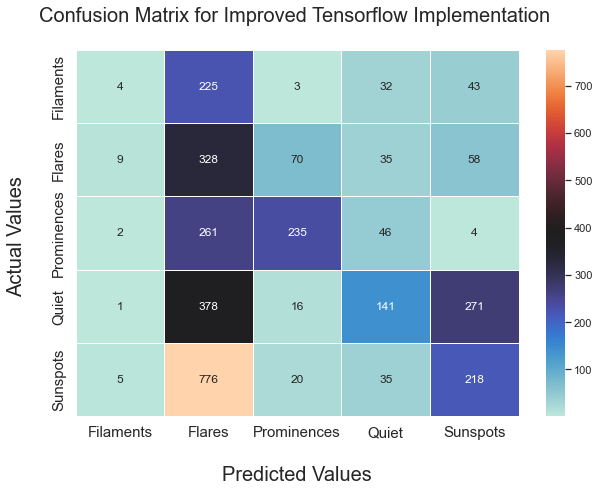

In [35]:
sns.set(rc={'figure.figsize':(9,7)})
ax = sns.heatmap(cf_matrix, annot=True,fmt="d" ,linewidths=.5, cmap="icefire", cbar = 'False')

ax.set_title('Confusion Matrix for Improved Tensorflow Implementation \n', fontsize = 20);
ax.set_xlabel('\nPredicted Values', fontsize = 20)
ax.set_ylabel('Actual Values \n', fontsize = 20);

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Filaments','Flares', 'Prominences', 'Quiet', 'Sunspots'], fontsize = 15)
ax.yaxis.set_ticklabels(['Filaments','Flares', 'Prominences', 'Quiet', 'Sunspots'], fontsize = 15)

## Display the visualization of the Confusion Matrix.
plt.tight_layout()
plt.savefig('tf_decol_imgs_aug.png', dpi = 200, bbox_inches = 'tight')

In [176]:
 def plot(name, title, train_data,val_data, x_label, y_label) :
    size = 15
    plt.rcParams['font.family'] = 'Times'
    font = {'fontname':'Times'}
    epochs = np.arange(1, 151,1)
    plt.figure(figsize=(7,5))
    plt.title(title, fontsize = 20, **font)
    plt.plot(train_data,linewidth=2, label = 'Training', color = 'black' )
    plt.plot(epochs, val_data, '--',linewidth=2, label = 'Validation', color = 'black',)
    plt.annotate(str(np.round(val_data[-1]*100, 1))+'%', (143, val_data[-1]+0.021), fontsize = 15, **font)
    plt.annotate(str(np.round(train_data[-1]*100, 1))+'%', (143, train_data[-1]-0.07), fontsize = 15, **font)


    plt.xlabel(x_label, fontsize = 20, **font)
    plt.ylabel(y_label, fontsize = 20, **font)
    plt.xticks(fontsize = 15)
    plt.yticks( fontsize = 15)
    plt.legend(fontsize = 15)
    plt.tight_layout()
    plt.savefig(name+'.jpg', dpi = 200, bbox_inches = 'tight')

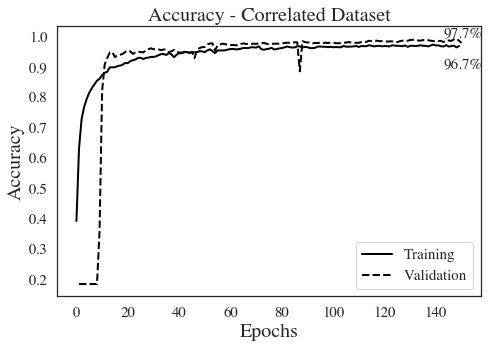

In [177]:

sns.set_theme(style = 'white')
title1 =  'Accuracy - Correlated Dataset'
plot('acc_coll_set',title1, results.history['accuracy'], results.history['val_accuracy'],x_label = 'Epochs', y_label = 'Accuracy')

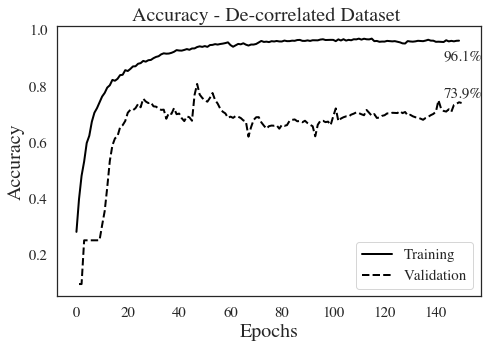

In [156]:
title2 = 'Accuracy - De-correlated Dataset '
plot('acc_decol',title2, results_dec.history['accuracy'], results_dec.history['val_accuracy'],x_label = 'Epochs', y_label = 'Accuracy')